# Visualising Results
## Overview
Here we visualise many of the outputs from the SNP- and SV-based population analyses for fairy tern (*Sterna nereis*) populations in Western Australian (*S. n. nereis*) and Aotearoa New Zealand (*S. n. davisae*) as well as the critically endangered kakī (*Himantopus novaezelandiae*). We examine the number proportion, and density of Runs of Homozygosity (ROHs) to compare relative levels of inbreeding (*fROH*). We then leverage these estimates of *F<sub>ROH</sub>* to infer recent demographic trends, and compare with pedigree-based estimates of inbreeding for kakī.  

We then explore population structure among fairy tern populations by visualising genome-wide F<sub>ST</sub>, and a multidimensional scaling (MDS) analysis generated by NGStools and examine the folded and unfolded site frequency spectrum (SFS) for each of the three taxa. Finally, we compare with estimates of putative masked and realised load in the tara iti and kakī populations.  

In our first step, we import the necessary python packages.  

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress
from sklearn.metrics import r2_score
from scipy.stats import mannwhitneyu
from scipy import stats

path = 'G:\My Drive\Data\S_nereis_ssp\genomic_data'
os.chdir(path)
print(os.getcwd())

## Alignment Depth


In [7]:
depth = pd.read_csv('sequence_depths.tsv', sep='\t')

audepth = depth[depth['Taxon'] == 'Sternula nereis nereis']['Aligned Depth'].mean()
tidepth = depth[depth['Taxon'] == 'Sternula nereis davisae']['Aligned Depth'].mean()
kiHCdepth = depth[depth['Taxon'] == 'Himantopus novaezelandiae']['Aligned Depth'].mean()
kiLCdepth = depth[depth['Taxon'] == 'Subsampled_Himantopus novaezelandiae']['Aligned Depth'].mean()

print('Mean AFT Depth: ', audepth)
print('Mean TI Depth: ', tidepth)
print('Mean low coverage KI Depth: ', kiLCdepth)
print('Mean high coverage KI Depth: ', kiHCdepth)

Mean AFT Depth:  15.131578947368421
Mean TI Depth:  11.020000000000001
Mean low coverage KI Depth:  10.483333333333334
Mean high coverage KI Depth:  40.512499999999996


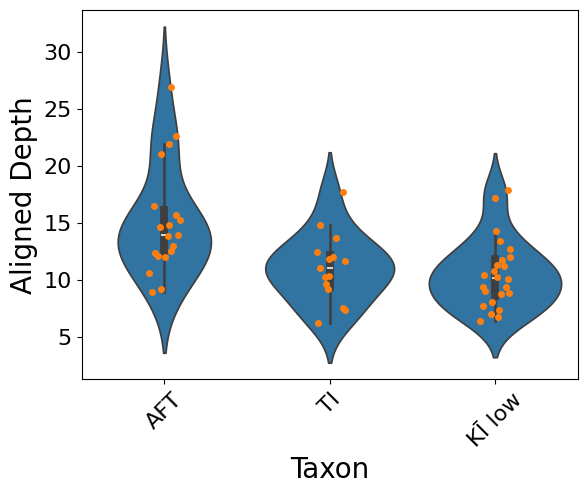

In [5]:
sns.violinplot(depth[depth['Taxon']!='Himantopus novaezelandiae'], x='Taxon', y='Aligned Depth')
sns.stripplot(depth[depth['Taxon']!='Himantopus novaezelandiae'], x='Taxon', y='Aligned Depth')
plt.xticks(['Sternula nereis nereis', 'Sternula nereis davisae', 'Subsampled_Himantopus novaezelandiae'], ['AFT', 'TI', 'KĪ low'], fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('Taxon', fontsize=20)
plt.ylabel('Aligned Depth', fontsize=20)

plt.savefig('plots/Supplemental_Fig_aligned_depth.png', dpi=300, bbox_inches='tight')

### Nucleotide diversity (π) 
Below we plot nucleotide diversity for both putatively neutral and all sites.  

C:\Users\Jana\AppData\Local\Temp\ipykernel_14220\901625067.py:7: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=au_neutralpi, x='x', y='Nucleotide Diversity', hue='Chr', palette=aupalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[0])
C:\Users\Jana\AppData\Local\Temp\ipykernel_14220\901625067.py:15: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=ti_neutralpi, x='x', y='Nucleotide Diversity', hue='Chr', palette=nzpalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[1])
C:\Users\Jana\AppData\Local\Temp\ipykernel_14220\901625067.py:23: UserWarning: 
The palette list has fewer values (2) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=kiLC_neutralpi, x='x', y='Nucleotide Diversity', hue='Chr', palette=kipalette,

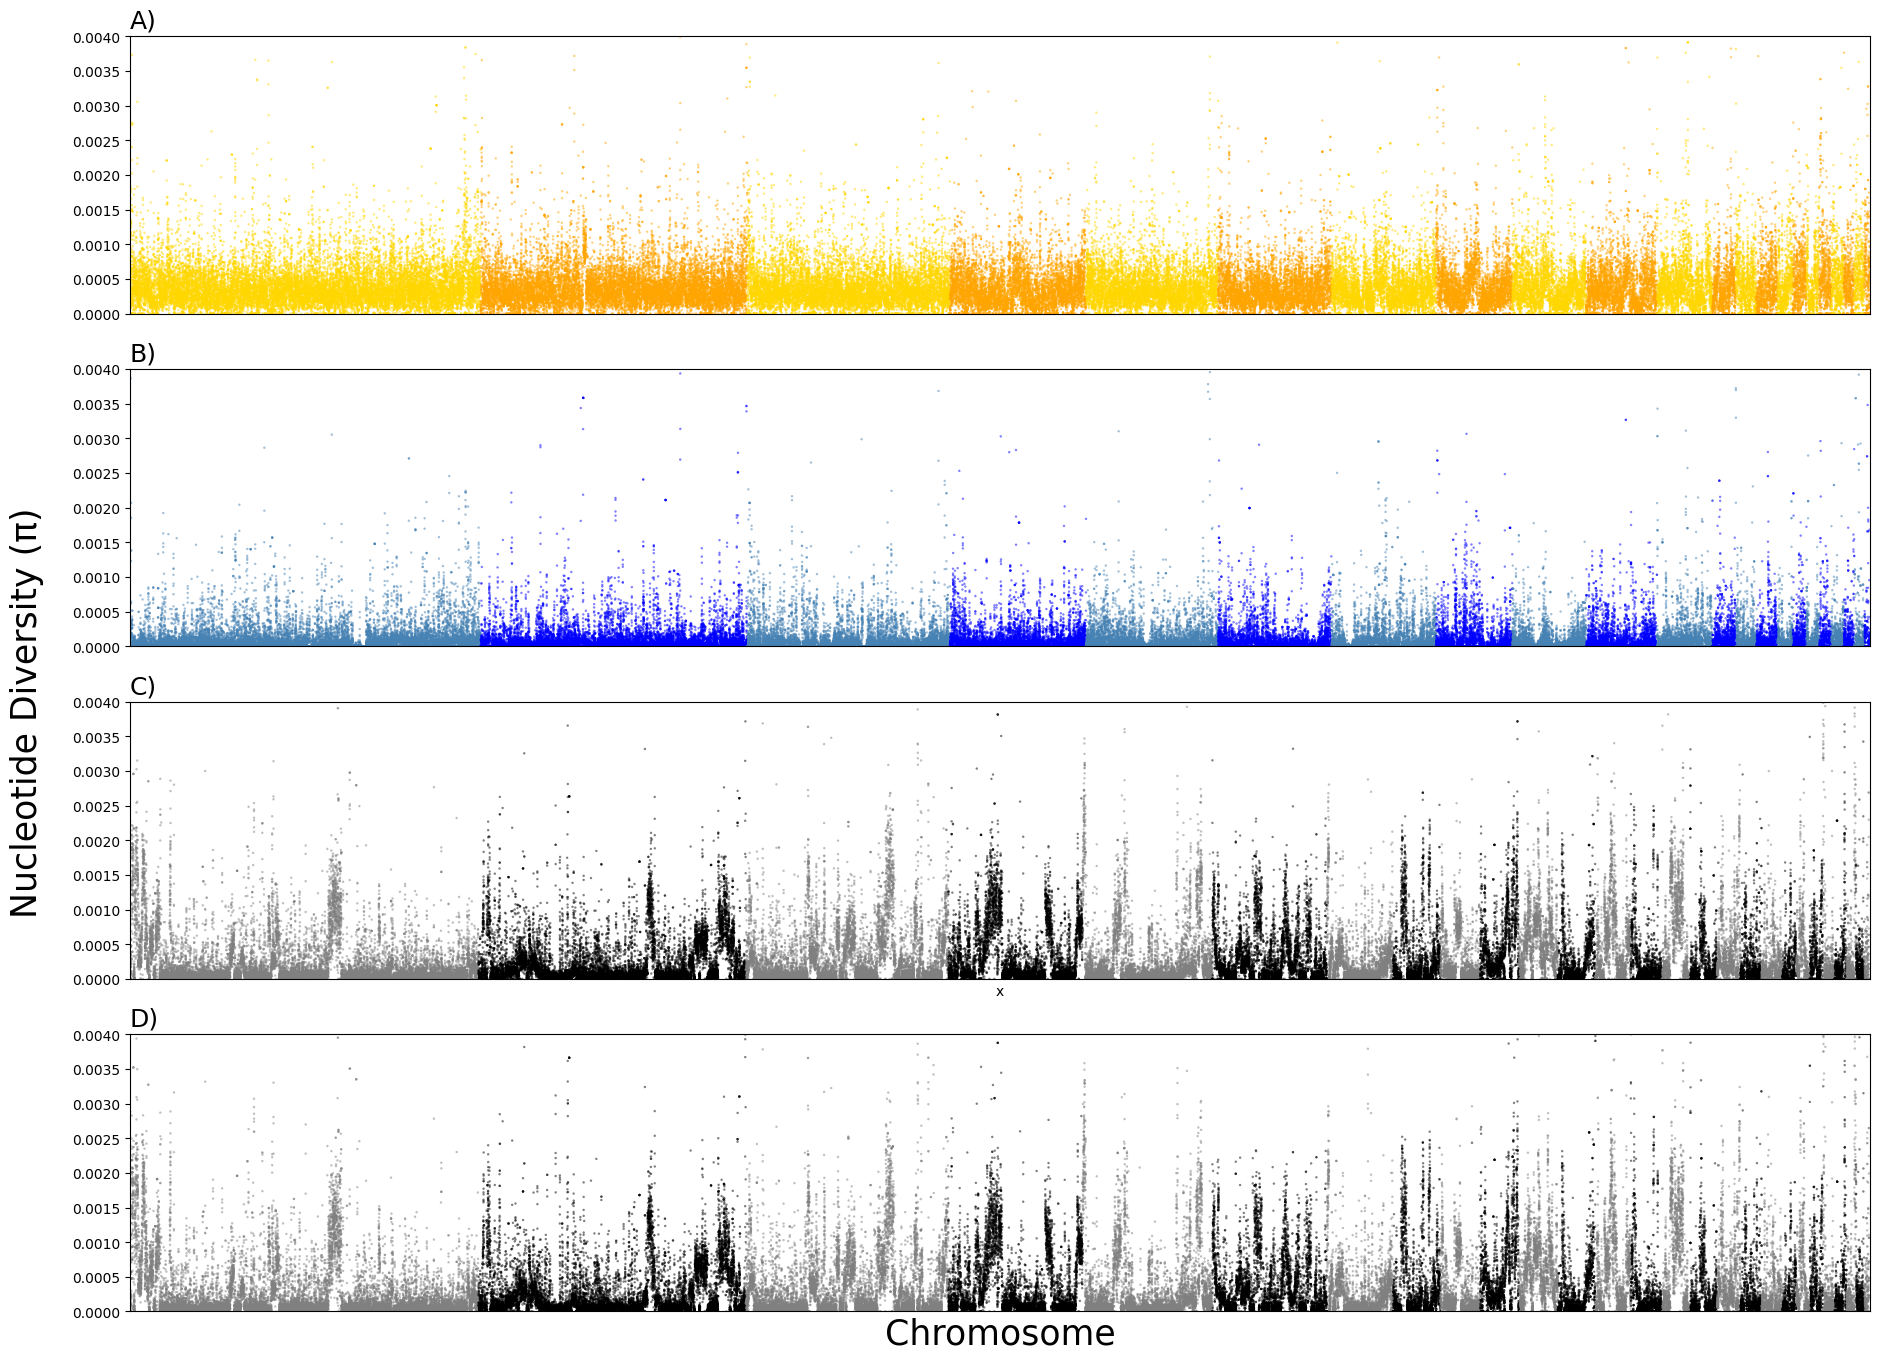

In [ ]:
aupalette = ['gold', 'orange']
nzpalette = ['steelblue', 'blue']
kipalette = ['grey', 'black']

fig, axs = plt.subplots(4, 1, figsize=(20, 15), sharex=False, sharey=True)

sns.scatterplot(data=au_neutralpi, x='x', y='Nucleotide Diversity', hue='Chr', palette=aupalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[0])
axs[0].set_title("A)", fontsize=18, loc='left')
axs[0].set_xlim(0, 108730)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_ylim(0, 0.004)
axs[0].set_xticks([])

sns.scatterplot(data=ti_neutralpi, x='x', y='Nucleotide Diversity', hue='Chr', palette=nzpalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[1])
axs[1].set_title("B)", fontsize=18, loc='left')
axs[1].set_xlim(0, 108730)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_ylim(0, 0.004)
axs[1].set_xticks([])

sns.scatterplot(data=ki_neutralpi, x='x', y='Nucleotide Diversity', hue='Chr', palette=kipalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[3])
axs[3].set_title("D)", fontsize=18, loc='left')
axs[3].set_xlim(0, 109399)
axs[3].set_ylabel('')
axs[3].set_ylim(0, 0.004)
axs[3].set_xticks([])
axs[3].set_xlabel('Chromosome', fontsize=25)

plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.1)
fig.supylabel('Nucleotide Diversity (π)', fontsize=25, x = 0.02)

plt.savefig('plots/Figure_3_nucleotideDiversity_neutral_closeY.png', dpi=300, bbox_inches='tight')

C:\Users\Jana\AppData\Local\Temp\ipykernel_20000\112954582.py:7: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=au_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palette=aupalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[0])
C:\Users\Jana\AppData\Local\Temp\ipykernel_20000\112954582.py:14: UserWarning: 
The palette list has fewer values (2) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=ti_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palette=nzpalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[1])
C:\Users\Jana\AppData\Local\Temp\ipykernel_20000\112954582.py:21: UserWarning: 
The palette list has fewer values (2) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=kiLC_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palett

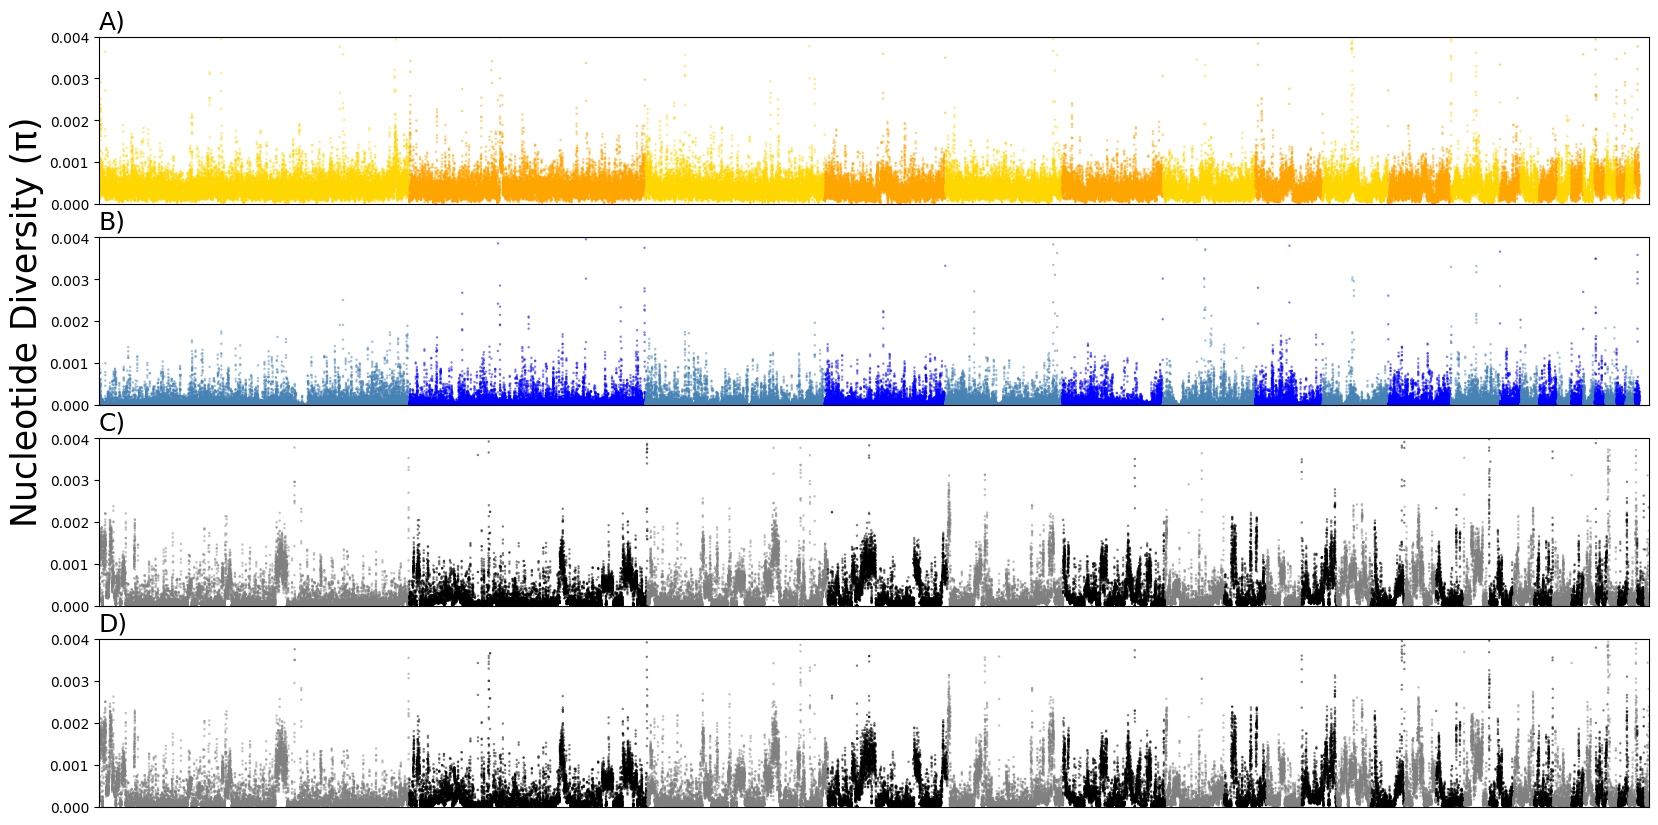

In [34]:
aupalette = ['gold', 'orange']
nzpalette = ['steelblue', 'blue']
kipalette = ['grey', 'black']

fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharex=True, sharey=True)

sns.scatterplot(data=au_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palette=aupalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[0])
axs[0].set_title('A)', fontsize=18, loc='left')
axs[0].set_xlim(0, 108730)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_ylim(0, 0.004)

sns.scatterplot(data=ti_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palette=nzpalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[1])
axs[1].set_title('B)', fontsize=18, loc='left')
axs[1].set_xlim(0, 108730)
axs[1].set_xlabel('')
axs[1].set_ylabel('Nucleotide Diversity (π)', fontsize=25)
axs[1].set_ylim(0, 0.004)

sns.scatterplot(data=kiLC_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palette=kipalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[2])
axs[2].set_title("C)", fontsize=18, loc='left')
axs[2].set_xlim(0, 109399)
axs[2].set_ylabel('')
axs[2].set_ylim(0, 0.004)
axs[2].set_xticks([])

sns.scatterplot(data=ki_wholeGenomePi, x='x', y='Nucleotide Diversity', hue='Chr', palette=kipalette, alpha=0.5, s=3, legend=False, edgecolor='none', ax=axs[3])
axs[3].set_title('D)', fontsize=18, loc='left')
axs[3].set_xlim(0, 109399)
axs[3].set_ylabel('')
axs[3].set_ylim(0, 0.004)

axs[-1].set_xlabel('Chromosome', fontsize=25)
axs[-1].set_xticks([])

plt.savefig('plots/nucleotideDiversity_whole-genome_closeY.png', dpi=300, bbox_inches='tight')

In [14]:
def mann_whitney_test(df, group_col, value_col, group1, group2):
    group1_values = df[df[group_col] == group1][value_col]
    group2_values = df[df[group_col] == group2][value_col]
    stat, p_value = mannwhitneyu(group1_values, group2_values, alternative='two-sided')
    return stat, p_value

au_neutralpi_grouped = pd.read_csv('angsd/diversity/AU_neutral_all_Thetas.pestPG', sep='\t', usecols=cols)
ti_neutralpi_grouped = pd.read_csv('angsd/diversity/TI_neutral_all_Thetas.pestPG', sep='\t', usecols=cols)
kiLC_neutralpi_grouped = pd.read_csv('angsd/diversity/KI_10x_neutral_all_Thetas.pestPG', sep='\t', usecols=cols)
ki_neutralpi_grouped = pd.read_csv('angsd/diversity/KI_neutral_all_Thetas.pestPG', sep='\t', usecols=cols)

au_neutralpi_grouped['Population'] = 'AU'
ti_neutralpi_grouped['Population'] = 'TI'
kiLC_neutralpi_grouped['Population'] = 'KI_10x'
ki_neutralpi_grouped['Population'] = 'KI'

neutralpi_grouped = pd.concat([au_neutralpi_grouped, ti_neutralpi_grouped, kiLC_neutralpi_grouped, ki_neutralpi_grouped], ignore_index=True)
neutralpi_grouped['Pi'] = neutralpi_grouped['tP'] / neutralpi_grouped['nSites']

groups = ['AU', 'TI', 'KI_10x', 'KI']
results_total = {}

for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        stat, p_value = mann_whitney_test(neutralpi_grouped, 'Population', 'Pi', group1, group2)
        results_total[f'{group1} vs {group2}'] = {'stat': stat, 'p_value': p_value}

# Print the results
print("Mann-Whitney U Test results for Nucleotide Diversity:")
for comparison, result in results_total.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

for i in range(len(groups)):
    standard_dev = neutralpi_grouped[neutralpi_grouped['Population']==groups[i]]['Pi'].std()
    count = neutralpi_grouped[neutralpi_grouped['Population']==groups[i]]['Pi'].count()
    standard_err = standard_dev / np.sqrt(count)
    print(f"Mean nucleotide diversity for {groups[i]}: {neutralpi_grouped[neutralpi_grouped['Population']==groups[i]]['Pi'].mean()} +/- {standard_err}")


Mann-Whitney U Test results for Nucleotide Diversity:
AU vs TI: U-statistic = 484.0, p-value = 1.4393605407614143e-08
AU vs KI_10x: U-statistic = 471.0, p-value = 0.00048759316754222535
AU vs KI: U-statistic = 435.0, p-value = 0.005712309369382591
TI vs KI_10x: U-statistic = 0.0, p-value = 2.5243211696355503e-09
TI vs KI: U-statistic = 0.0, p-value = 2.5243211696355503e-09
KI_10x vs KI: U-statistic = 262.0, p-value = 0.07763141799316176
Mean nucleotide diversity for AU: 0.00045338132323455483 +/- 1.686350609278395e-05
Mean nucleotide diversity for TI: 0.0001358866490847765 +/- 5.707323546449401e-06
Mean nucleotide diversity for KI_10x: 0.00034013886704312146 +/- 2.2926859721066697e-05
Mean nucleotide diversity for KI: 0.0003860313792227254 +/- 2.5945687509983524e-05


In [15]:
groups = ['AU', 'TI', 'KI_10x', 'KI']
results_total = {}

for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        stat, p_value = mann_whitney_test(neutralpi_grouped, 'Population', 'Tajima', group1, group2)
        results_total[f'{group1} vs {group2}'] = {'stat': stat, 'p_value': p_value}

# Print the results
print("Mann-Whitney U Test results for Tajima's D:")
for comparison, result in results_total.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

for i in range(len(groups)):
    standard_dev = neutralpi_grouped[neutralpi_grouped['Population']==groups[i]]['Tajima'].std()
    count = neutralpi_grouped[neutralpi_grouped['Population']==groups[i]]['Tajima'].count()
    standard_err = standard_dev / np.sqrt(count)
    print(f"Mean Tajima's D for {groups[i]}: {neutralpi_grouped[neutralpi_grouped['Population']==groups[i]]['Tajima'].mean()} +/- {standard_err}")

Mann-Whitney U Test results for Tajima's D:
AU vs TI: U-statistic = 0.0, p-value = 1.4393605407614143e-08
AU vs KI_10x: U-statistic = 496.0, p-value = 6.60732599976876e-05
AU vs KI: U-statistic = 506.0, p-value = 2.777182464510642e-05
TI vs KI_10x: U-statistic = 552.0, p-value = 3.126748169931075e-07
TI vs KI: U-statistic = 552.0, p-value = 3.126748169931075e-07
KI_10x vs KI: U-statistic = 431.0, p-value = 0.25353780619794264
Mean Tajima's D for AU: 0.879092 +/- 0.014126961126394685
Mean Tajima's D for TI: 2.0898116818181816 +/- 0.06450365901371422
Mean Tajima's D for KI_10x: 0.3450033703703703 +/- 0.17424684494304168
Mean Tajima's D for KI: 0.14464640740740736 +/- 0.1788015848160949


### Tajima's D
Here we  plot Tajima's D estimates for Australian fairy tern and tara iti. 

In [ ]:
auTajima = au_neutralpi[['Chr', 'WinCenter', 'Tajima', 'nSites']]
tiTajima = ti_neutralpi[['Chr', 'WinCenter', 'Tajima', 'nSites']]

auTajima['x'] = range(len(auTajima))
tiTajima['x'] = range(len(tiTajima))

plt.figure(figsize=(14,7))
ax = sns.scatterplot(data=auTajima, x='x', y='Tajima', hue='Chr', palette=aupalette, alpha=0.5, s=3, legend=False)
sns.scatterplot(data=tiTajima, x='x', y='Tajima', hue='Chr', palette=nzpalette, alpha=0.5, s=3, legend=False)

ax.set_xlabel('Chromosome Position', fontsize=14)
ax.set_ylabel("Tajima's D", fontsize=14)

plt.savefig('plots/GLOBAL_Tajima_neutralSites.png')

## Site Frequency Spectrum
### SNPs
Below we plot the site frequency spectrum (SFS) for putatively neutral sites and whole genome sites as a means to indirectly examine realised and potential genetic load in fairy terns and kakī.  

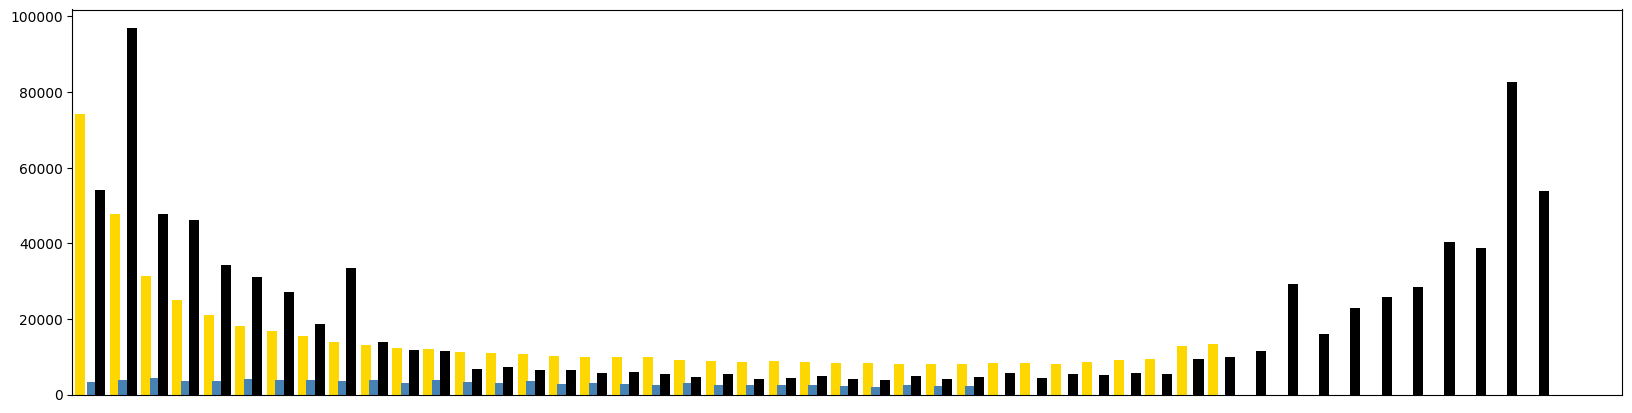

In [2]:
ausfs = pd.read_csv("angsd/sfs/AU_neutral_modified.sfs", sep='\t')
tisfs = pd.read_csv("angsd/sfs/TI_neutral_modified.sfs", sep='\t')
kisfs = pd.read_csv("angsd/sfs/KI_neutral_modified.sfs", sep='\t')

ausfs = ausfs.iloc[1:38]
tisfs = tisfs.iloc[1:30]
kisfs = kisfs.iloc[1:48]

bar_width = 0.32

x_ausfs = ausfs['Allele Count'] + 0.1
x_ausfs[1] = 1
x_tisfs = tisfs['Allele Count'] + bar_width + 0.05
x_kisfs = kisfs['Allele Count'] + 2 * bar_width

plt.figure(figsize=(20, 5))
plt.bar(x_ausfs, ausfs['SFS Value'], width=bar_width, color='gold')
plt.bar(x_tisfs, tisfs['SFS Value'], width=bar_width, color='steelblue')
plt.bar(x_kisfs, kisfs['SFS Value'], width=bar_width, color='black')

plt.xlim(left=0.75)
plt.xticks([])

plt.savefig('plots/SFS_neutralSites.png', dpi=300, bbox_inches='tight')

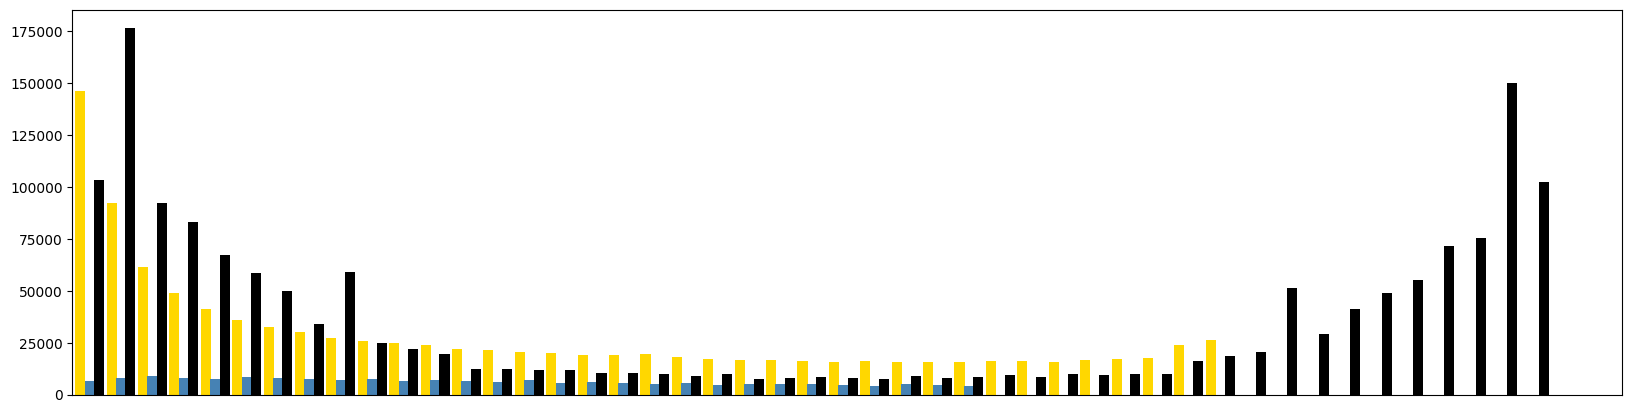

In [2]:
ausfs = pd.read_csv("angsd/sfs/AU_whole-genome_modified.sfs", sep='\t')
tisfs = pd.read_csv("angsd/sfs/TI_whole-genome_modified.sfs", sep='\t')
kisfs = pd.read_csv("angsd/sfs/KI_whole-genome_modified.sfs", sep='\t')

ausfs = ausfs.iloc[1:38]
tisfs = tisfs.iloc[1:30]
kisfs = kisfs.iloc[1:48]

bar_width = 0.32

x_ausfs = ausfs['Allele Count']
x_tisfs = tisfs['Allele Count'] + bar_width - 0.02
x_kisfs = kisfs['Allele Count'] + 2 * bar_width - 0.04

plt.figure(figsize=(20, 5))

plt.bar(x_ausfs, ausfs['SFS Value'], width=bar_width, color='gold')
plt.bar(x_tisfs, tisfs['SFS Value'], width=bar_width, color='steelblue')
plt.bar(x_kisfs, kisfs['SFS Value'], width=bar_width, color='black')

plt.xlim(left=0.75)
plt.xticks([])

plt.savefig('plots/SFS_whole-genome_Sites.png', dpi=300, bbox_inches='tight')

<BarContainer object of 29 artists>

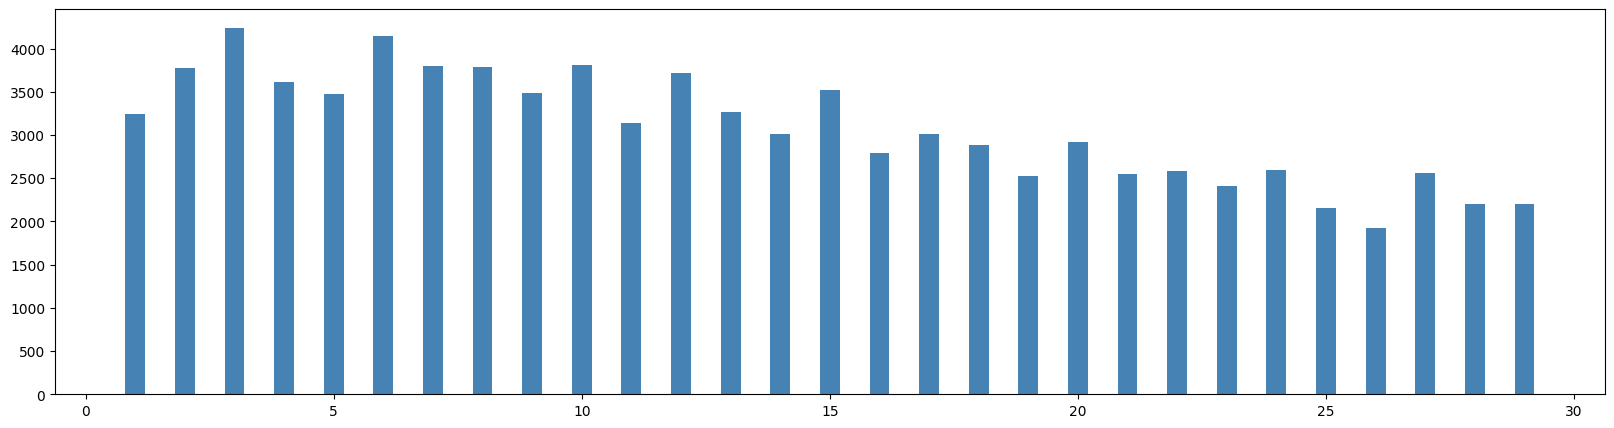

In [3]:
tisfs = pd.read_csv("angsd/sfs/TI_neutral_modified.sfs", sep='\t')
tisfs = tisfs.iloc[1:30]

bar_width = 0.4
plt.figure(figsize=(20, 5))

plt.bar(tisfs['Allele Count'], tisfs['SFS Value'], width=bar_width, color='steelblue')

### SV SFS

In [4]:
SVs = pd.read_csv('graphtyper/pop_SV_allele_frequency_summary.tsv', delimiter='\t')

SVs.head()

,Chromosome,Position,Sample,Genotype,Population
0,CM020437.1_RagTag,319096,AU01,HomAlt,AU
1,CM020437.1_RagTag,319096,AU03,HomAlt,AU
2,CM020437.1_RagTag,319096,AU04,HomAlt,AU
3,CM020437.1_RagTag,319096,AU06,HomAlt,AU
4,CM020437.1_RagTag,319096,AU08,HomAlt,AU


([], [])

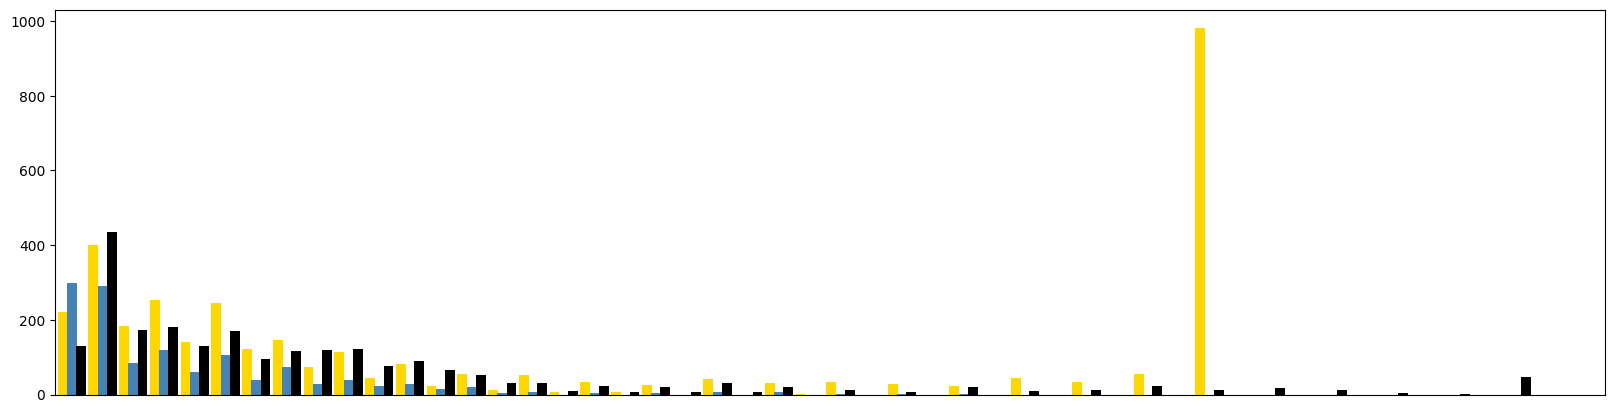

In [5]:
SVs = pd.read_csv('graphtyper/pop_SV_allele_frequency_summary.tsv', delimiter='\t')
sfs_sv = SVs[SVs['Genotype'] != 'HomRef']
sfs_sv = sfs_sv.groupby(['Chromosome', 'Position', 'Population', 'Genotype']).size().reset_index(name='Allele Count')
sfs_sv.loc[sfs_sv['Genotype'].isin(['HomAlt']), 'Allele Count'] *= 2

grouped_sv = sfs_sv.groupby(['Population'])['Allele Count'].value_counts().reset_index(name='Count')

auSVs = grouped_sv[grouped_sv['Population']=='AU']
tiSVs = grouped_sv[grouped_sv['Population']=='TI']
kiSVs = grouped_sv[grouped_sv['Population']=='KI']

auSVs = auSVs.iloc[0:38]
tiSVs = tiSVs.iloc[0:30]
kiSVs = kiSVs.iloc[0:48]

bar_width = 0.32

x_auSVs = auSVs['Allele Count']
x_tiSVs = tiSVs['Allele Count'] + bar_width - 0.02
x_kiSVs = kiSVs['Allele Count'] + 2 * bar_width - 0.04

plt.figure(figsize=(20, 5))

plt.bar(x_auSVs, auSVs['Count'], width=bar_width, color='gold')
plt.bar(x_tiSVs, tiSVs['Count'], width=bar_width, color='steelblue')
plt.bar(x_kiSVs, kiSVs['Count'], width=bar_width, color='black')

plt.xlim(left=0.75)
plt.xticks([])

In [7]:
tisize = 15
ausize = 19
SVs = pd.read_csv('graphtyper/pop_SV_allele_frequency_summary.tsv', delimiter='\t')
SVs = SVs[SVs['Population']!='KI']
SVs = SVs.groupby(['Chromosome', 'Position', 'Population', 'Genotype']).size().reset_index(name='Allele Count')

# Multiply 'Allele Count' by 2 for 'HomRef' and 'HomAlt' genotypes
SVs.loc[SVs['Genotype'].isin(['HomRef', 'HomAlt']), 'Allele Count'] *= 2

pivot_SVs = SVs.pivot_table(index=['Chromosome', 'Position', 'Population'], columns='Genotype', values='Allele Count', fill_value=0).reset_index()
pivot_SVs.columns.name = None
pivot_SVs = pivot_SVs.rename_axis(None, axis=1)

pivot_SVs['HomAlt Freq'] = np.where(pivot_SVs['Population']=='AU',
                                    pivot_SVs['HomAlt'] / 38,
                                    pivot_SVs['HomAlt'] / 30)

pivot_SVs['Het Freq'] = np.where(pivot_SVs['Population']=='AU',
                                    pivot_SVs['Het'] / 38,
                                    pivot_SVs['Het'] / 30)

pivot_SVs['p1'] = np.where(pivot_SVs['Population']=='AU',
                           (pivot_SVs['Het'] + pivot_SVs['HomAlt']) / 38,
                           (pivot_SVs['Het'] + pivot_SVs['HomAlt']) / 30)

pivot_SVs['q2'] = 1 - pivot_SVs['p1']

pivot_SVs['Expect HomAlt Indiv'] = np.where(pivot_SVs['Population']=='AU',
                                    ausize * pivot_SVs['p1']**2,
                                    tisize * pivot_SVs['p1']**2)
pivot_SVs['Expect Het Indiv'] = np.where(pivot_SVs['Population']=='AU',
                                    ausize * 2 * pivot_SVs['p1'] * pivot_SVs['q2'],
                                    tisize * 2 * pivot_SVs['p1'] * pivot_SVs['q2'])
pivot_SVs['Expect HomRef Indiv'] = np.where(pivot_SVs['Population']=='AU',
                                    ausize * pivot_SVs['q2']**2,
                                    tisize * pivot_SVs['q2']**2)

pivot_SVs['Ho'] = np.where(pivot_SVs['Population']=='AU',
                                    pivot_SVs['Het'] / 38,
                                    pivot_SVs['Het'] / 30)

pivot_SVs['He'] = 1 - (pivot_SVs['p1']**2 + pivot_SVs['q2']**2)

pivot_SVs['pbar'] = np.where(pivot_SVs['Population']=='AU',
                                    pivot_SVs['Het'] / 38,
                                    pivot_SVs['Het'] / 30)

pivot_SVs[pivot_SVs['Population']=='TI'].head()

,Chromosome,Position,Population,Het,HomAlt,HomRef,HomAlt Freq,Het Freq,p1,q2,Expect HomAlt Indiv,Expect Het Indiv,Expect HomRef Indiv,Ho,He,pbar
1,CM020437.1_RagTag,319096,TI,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.00,0.0,15.00,0.0,0.00,0.0
3,CM020437.1_RagTag,347352,TI,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.00,0.0,15.00,0.0,0.00,0.0
5,CM020437.1_RagTag,393683,TI,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.00,0.0,15.00,0.0,0.00,0.0
7,CM020437.1_RagTag,506004,TI,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.00,0.0,15.00,0.0,0.00,0.0
9,CM020437.1_RagTag,550222,TI,3.0,0.0,24.0,0.0,0.1,0.1,0.9,0.15,2.7,12.15,0.1,0.18,0.1


### D<sub>xy</sub>


In [35]:
au_neutral_maf = pd.read_csv('angsd/diversity/AU_neutral_Dxy_AncAllele.mafs', sep = '\t')
ti_neutral_maf = pd.read_csv('angsd/diversity/TI_neutral_Dxy_AncAllele.mafs', sep = '\t')

#au_whole-genome_maf = pd.read_csv('neutral/diversity/AU_whole-genome_Dxy_AncAllele.mafs', sep = '\t')
#ti_whole-genome_maf = pd.read_csv('neutral/diversity/TI_whole-genome_Dxy_AncAllele.mafs', sep = '\t')

neutral_fairy_maf = pd.merge(au_neutral_maf, ti_neutral_maf, on=['chromo', 'position', 'major', 'minor', 'ref', 'anc'], suffixes=('_au', '_ti'))
neutral_fairy_maf['Dxy']= (neutral_fairy_maf['knownEM_au'] * (1-neutral_fairy_maf['knownEM_ti'])) + (neutral_fairy_maf['knownEM_ti'] * (1 - neutral_fairy_maf['knownEM_au']))

#whole-genome_fairy_maf = pd.merge(au_whole-genome_maf, ti_whole-genome_maf, on=['chromo', 'position', 'major', 'minor', 'ref', 'anc'], suffixes=('_au', '_ti'))
#whole-genome_fairy_maf['Dxy']= (whole-genome_fairy_maf['knownEM_au'] * (1-whole-genome_fairy_maf['knownEM_ti'])) + (whole-genome_fairy_maf['knownEM_ti'] * (1 - whole-genome_fairy_maf['knownEM_au']))

neutral_grouped = neutral_fairy_maf[['chromo', 'position', 'Dxy']].groupby('chromo')

neutral_fairy_maf[['chromo', 'position', 'Dxy']].head()

,chromo,position,Dxy
0,CM020437.1_RagTag,540,0.499841
1,CM020437.1_RagTag,562,0.500000
2,CM020437.1_RagTag,1003,0.469992
3,CM020437.1_RagTag,1030,0.500000
4,CM020437.1_RagTag,1117,0.026316


In [36]:
bin_size = 50000
step_size = 10000

results = []

for chromosome, group in neutral_grouped:
    print(f"Processing chromosome: {chromosome}")

    # Start to define start and end for chromosome bins
    min_position = group['position'].min()
    max_position = group['position'].max()

    # Bin the positions
    bins = np.arange(min_position, max_position + bin_size, step_size)

    group['bins'] = pd.cut(group['position'], bins=bins, include_lowest=True)
    bin_Dxy = group.groupby('bins', observed=False)['Dxy'].mean().reset_index()

    # Add chromosome information to the result
    bin_Dxy['chromosome'] = chromosome

    results.append(bin_Dxy)

Processing chromosome: CM020437.1_RagTag
Processing chromosome: CM020438.1_RagTag
Processing chromosome: CM020439.1_RagTag
Processing chromosome: CM020440.1_RagTag
Processing chromosome: CM020441.1_RagTag
Processing chromosome: CM020442.1_RagTag
Processing chromosome: CM020443.1_RagTag
Processing chromosome: CM020444.1_RagTag
Processing chromosome: CM020445.1_RagTag
Processing chromosome: CM020446.1_RagTag
Processing chromosome: CM020447.1_RagTag
Processing chromosome: CM020448.1_RagTag
Processing chromosome: CM020449.1_RagTag
Processing chromosome: CM020450.1_RagTag
Processing chromosome: CM020451.1_RagTag
Processing chromosome: CM020452.1_RagTag
Processing chromosome: CM020453.1_RagTag
Processing chromosome: CM020454.1_RagTag
Processing chromosome: CM020455.1_RagTag
Processing chromosome: CM020456.1_RagTag
Processing chromosome: CM020457.1_RagTag
Processing chromosome: CM020458.1_RagTag


In [45]:
flat_results = np.vstack(results)

results= pd.DataFrame(flat_results, columns=['bins', 'Dxy', 'chromosome'])
results['pos'] = range(len(results))

results.head()

,bins,Dxy,chromosome,pos
0,"(539.999, 10540.0]",0.438933,CM020437.1_RagTag,0
1,"(10540.0, 20540.0]",NaN,CM020437.1_RagTag,1
2,"(20540.0, 30540.0]",NaN,CM020437.1_RagTag,2
3,"(30540.0, 40540.0]",0.052675,CM020437.1_RagTag,3
4,"(40540.0, 50540.0]",NaN,CM020437.1_RagTag,4


In [ ]:
plt.figure(figsize=(20,5))

palette=['grey', 'black']

ax = sns.scatterplot(results, x='pos', y='Dxy', edgecolor='none', hue='chromosome', palette=palette, alpha=0.5, s=3, legend=False)
ax.set_title('D)', fontsize=20, loc='left')
ax.set_xlabel('Chromosome', fontsize=20)
ax.set_ylabel("$D{_X}{_Y}$", fontsize=18)
ax.set_xticks([])
ax.set_xlim(0, 108896)
ax.set_ylim(0, 1)

plt.savefig('plots/neutral_Dxy.png', dpi=300, bbox_inches='tight')

In [ ]:
chr1_dxy = results[results['chromosome']=='CM020437.1_RagTag']

plt.figure(figsize=(20,5))

#palette = ['#132613', '#1c781c']
palette=['grey', 'black']

ax = sns.scatterplot(chr1_dxy, x='pos', y='Dxy', edgecolor='none', hue='chromosome', palette=palette, alpha=0.5, s=3, legend=False)
ax.set_xlabel('Chromosome Position', fontsize=14)
ax.set_ylabel("$D{_X}{_Y}$", fontsize=14)
ax.set_xticks([])
ax.set_xlim(0, 21927)
ax.set_ylim(0, 1)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

plt.savefig('plots/chr1_neutral_Dxy.png', dpi=300, bbox_inches='tight')

In [80]:
# Find total allele count
indiv_total = indiv_del.groupby(['Sample', 'Population', 'Consequence', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Allele Count')

# Sum of derived heterozygous alleles
indiv_het = indiv_del[indiv_del['Genotype'] == 1]
indiv_het = indiv_het.groupby(['Sample', 'Population', 'Consequence', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Het Allele Count')

# Sum of derived homozygous alleles 
indiv_hom = indiv_del[indiv_del['Genotype'] == 2]
indiv_hom = indiv_hom.groupby(['Sample', 'Population', 'Consequence', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Hom Allele Count')

In [81]:
indiv_total.head()

,Sample,Population,Consequence,Pop_Consequence,Allele Count
0,AU01,AU,Intolerant,AU-Intolerant,429
1,AU01,AU,Tolerant,AU-Tolerant,1791
2,AU03,AU,Intolerant,AU-Intolerant,412
3,AU03,AU,Tolerant,AU-Tolerant,1760
4,AU04,AU,Intolerant,AU-Intolerant,412


Now we examine the total number of putatively harmful derived alleles (`Allele Count`), then the number of putatively harmful derived alleles in a 'masked' state (`Het Allele Count`), and finally the number of puatively harmful alleles likely contributing to realised load (`Hom Allele Count`).

In [82]:
allele_prop = pd.merge(indiv_total, indiv_het, on=['Sample', 'Population', 'Consequence', 'Pop_Consequence'])
allele_prop = pd.merge(allele_prop, indiv_hom, on=['Sample', 'Population', 'Consequence', 'Pop_Consequence'])

allele_prop['Het Prop'] = allele_prop['Het Allele Count'] / allele_prop['Allele Count']
allele_prop['Hom Prop'] = allele_prop['Hom Allele Count'] / allele_prop['Allele Count']

allele_prop.head()

,Sample,Population,Consequence,Pop_Consequence,Allele Count,Het Allele Count,Hom Allele Count,Het Prop,Hom Prop
0,AU01,AU,Intolerant,AU-Intolerant,429,265,164,0.617716,0.382284
1,AU01,AU,Tolerant,AU-Tolerant,1791,789,1002,0.440536,0.559464
2,AU03,AU,Intolerant,AU-Intolerant,412,252,160,0.611650,0.388350
3,AU03,AU,Tolerant,AU-Tolerant,1760,786,974,0.446591,0.553409
4,AU04,AU,Intolerant,AU-Intolerant,412,268,144,0.650485,0.349515


C:\Users\Jana\AppData\Local\Temp\ipykernel_26680\4110701605.py:7: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(allele_prop, x='Pop_Consequence', y='Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[0])
C:\Users\Jana\AppData\Local\Temp\ipykernel_26680\4110701605.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
C:\Users\Jana\AppData\Local\Temp\ipykernel_26680\4110701605.py:16: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(allele_prop, x='Pop_Consequence', y='Het Prop', hue='Pop_Consequence', hue_order=ord

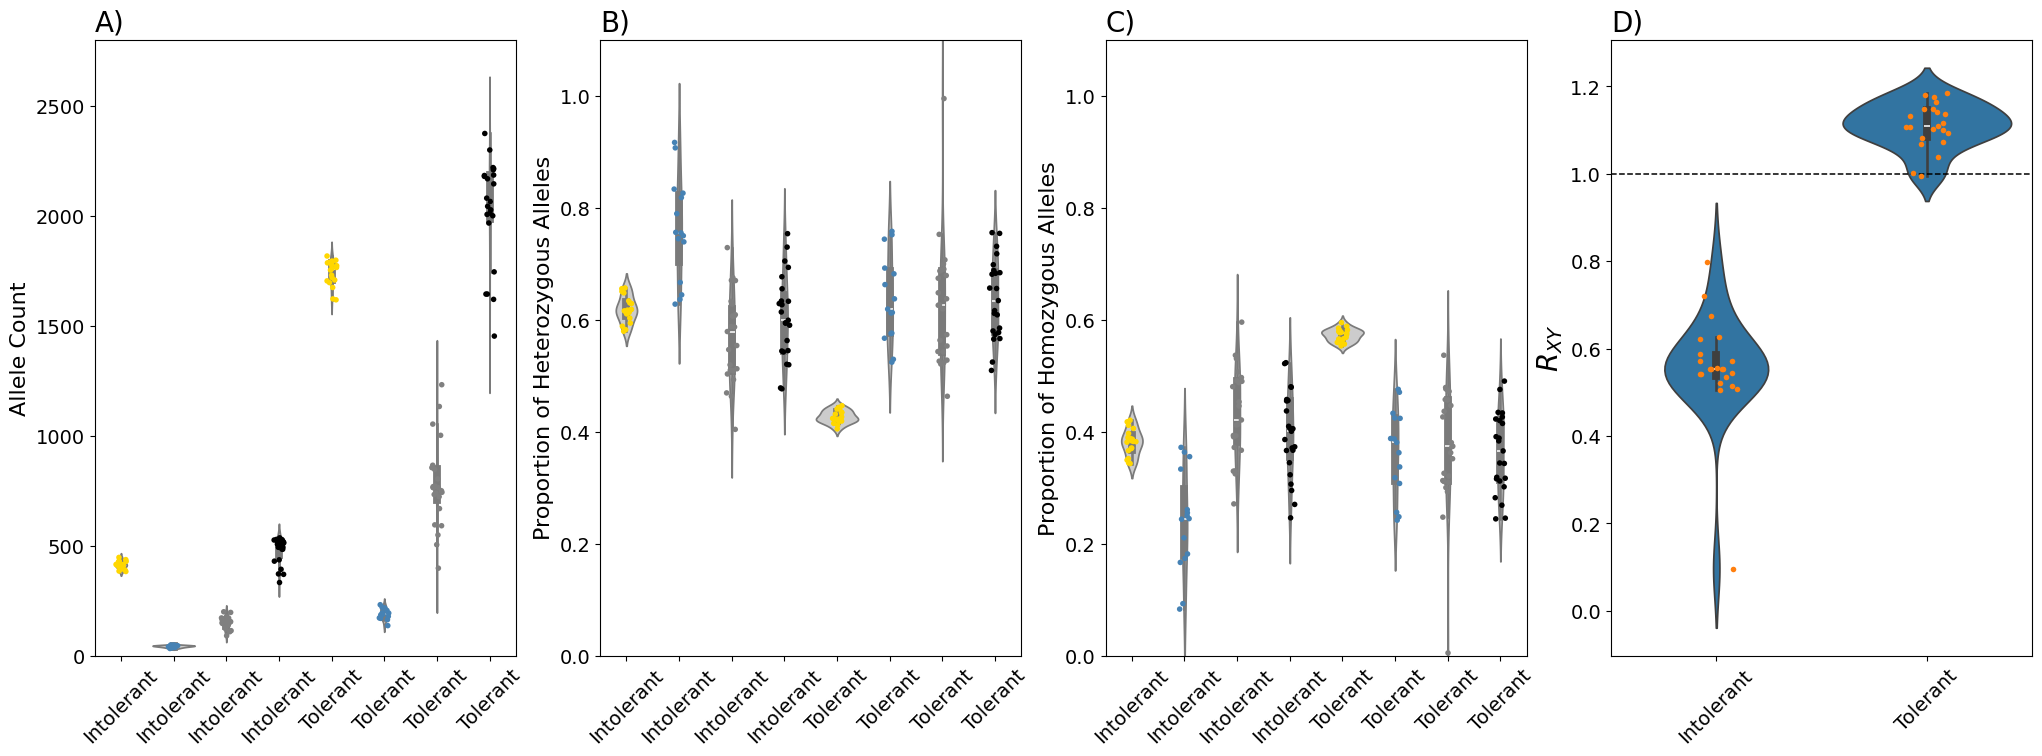

In [104]:
palette = ['gold', 'steelblue', 'grey', 'black']
order = ['AU-Intolerant', 'TI-Intolerant', 'KI_10X-Intolerant', 'KI-Intolerant', 'AU-Tolerant', 'TI-Tolerant', 'KI_10X-Tolerant', 'KI-Tolerant']

fig, axes = plt.subplots(1, 4, figsize=(25, 8), sharex=False, sharey=False)

sns.violinplot(allele_prop, x='Pop_Consequence', y='Allele Count', order=order, color='0.8', ax=axes[0])
sns.stripplot(allele_prop, x='Pop_Consequence', y='Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[0])
axes[0].set_title('A)', loc='left', fontsize=20)
axes[0].set_xlabel('')
axes[0].set_ylabel('Allele Count', fontsize=16)
axes[0].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[0].tick_params(axis='y', which='major', labelsize=14)
axes[0].set_ylim(0, 2800)

sns.violinplot(allele_prop, x='Pop_Consequence', y='Het Prop', order=order, color='0.8', ax=axes[1])
sns.stripplot(allele_prop, x='Pop_Consequence', y='Het Prop', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[1])
axes[1].set_title('B)', loc='left', fontsize=20)
axes[1].set_xlabel('')
axes[1].set_ylabel('Proportion of Heterozygous Alleles', fontsize=16)
axes[1].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[1].tick_params(axis='y', which='major', labelsize=14)
axes[1].set_ylim(0, 1.1)

sns.violinplot(allele_prop, x='Pop_Consequence', y='Hom Prop', order=order, color='0.8', ax=axes[2])
sns.stripplot(allele_prop, x='Pop_Consequence', y='Hom Prop', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[2])
axes[2].set_title('C)', loc='left', fontsize=20)
axes[2].set_xlabel('')
axes[2].set_ylabel('Proportion of Homozygous Alleles', fontsize=16)
axes[2].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[2].tick_params(axis='y', which='major', labelsize=14)
axes[2].set_ylim(0, 1.1)

sns.violinplot(data=Rxy_noNeutral, x='Consequence', y='Rxy', ax=axes[3])
sns.stripplot(data=Rxy_noNeutral, x='Consequence', y='Rxy', jitter=True, size=4, ax=axes[3])
axes[3].axhline(1, color="black", linestyle="dashed", linewidth=1.1)
axes[3].set_title('D)',loc='left',  fontsize=20)
axes[3].set_xlabel('')
axes[3].set_ylabel('$R_{XY}$', fontsize=20)
axes[3].set_xticklabels(['Intolerant', 'Tolerant', 'Intergenic'], fontsize = 14, rotation=45)
axes[3].tick_params(axis='y', which='major', labelsize=14)

plt.savefig('plots/Figure_6_SNP_load_summary.png', dpi=300, bbox_inches='tight')

In response to reviewer feedback where figures representing allele proportions were unclear, we now plot individual allele counts.

C:\Users\Jana\AppData\Local\Temp\ipykernel_17264\1118393846.py:7: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(allele_prop, x='Pop_Consequence', y='Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[0])
C:\Users\Jana\AppData\Local\Temp\ipykernel_17264\1118393846.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
C:\Users\Jana\AppData\Local\Temp\ipykernel_17264\1118393846.py:16: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(allele_prop, x='Pop_Consequence', y='Het Allele Count', hue='Pop_Consequence', hue_order=order, palette=palett

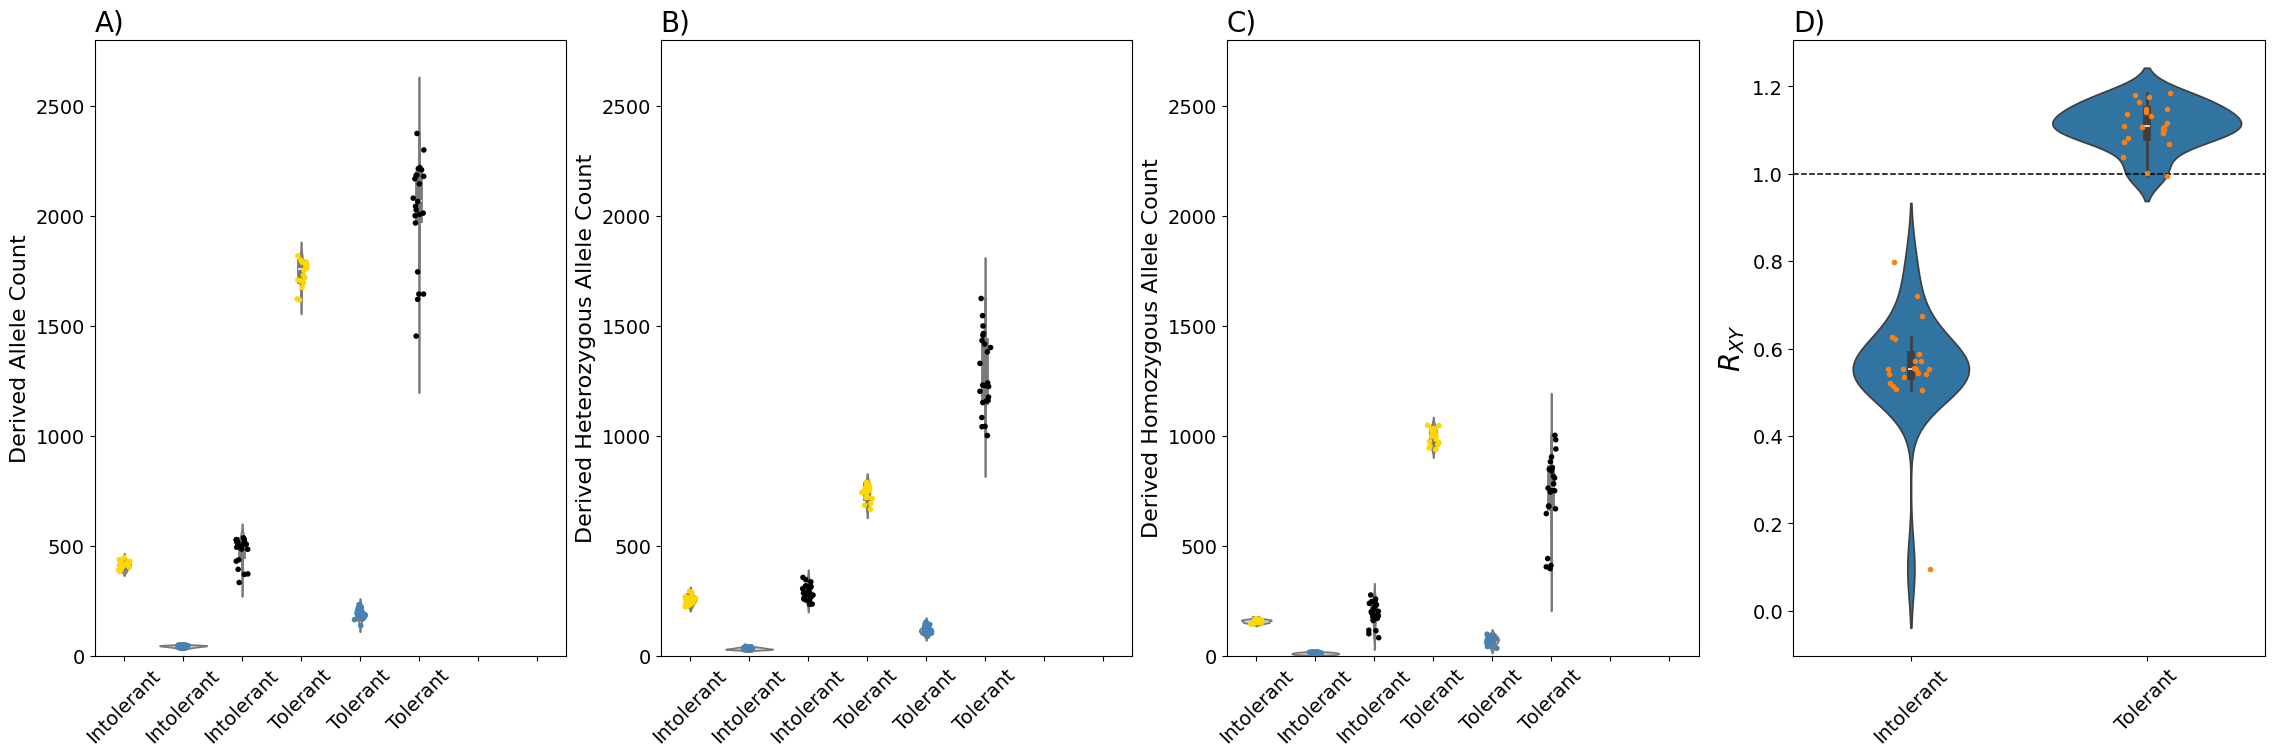

In [25]:
palette = ['gold', 'steelblue', 'black']
order = ['AU-Intolerant', 'TI-Intolerant', 'KI-Intolerant', 'AU-Tolerant', 'TI-Tolerant', 'KI-Tolerant']

fig, axes = plt.subplots(1, 4, figsize=(28, 8), sharex=False, sharey=False)

sns.violinplot(allele_prop, x='Pop_Consequence', y='Allele Count', order=order, color='0.8', ax=axes[0])
sns.stripplot(allele_prop, x='Pop_Consequence', y='Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[0])
axes[0].set_title('A)', loc='left', fontsize=20)
axes[0].set_xlabel('')
axes[0].set_ylabel('Derived Allele Count', fontsize=16)
axes[0].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[0].tick_params(axis='y', which='major', labelsize=14)
axes[0].set_ylim(0, 2800)

sns.violinplot(allele_prop, x='Pop_Consequence', y='Het Allele Count', order=order, color='0.8', ax=axes[1])
sns.stripplot(allele_prop, x='Pop_Consequence', y='Het Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[1])
axes[1].set_title('B)', loc='left', fontsize=20)
axes[1].set_xlabel('')
axes[1].set_ylabel('Derived Heterozygous Allele Count', fontsize=16)
axes[1].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[1].tick_params(axis='y', which='major', labelsize=14)
axes[1].set_ylim(0, 2800)

sns.violinplot(allele_prop, x='Pop_Consequence', y='Hom Allele Count', order=order, color='0.8', ax=axes[2])
sns.stripplot(allele_prop, x='Pop_Consequence', y='Hom Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[2])
axes[2].set_title('C)', loc='left', fontsize=20)
axes[2].set_xlabel('')
axes[2].set_ylabel('Derived Homozygous Allele Count', fontsize=16)
axes[2].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[2].tick_params(axis='y', which='major', labelsize=14)
axes[2].set_ylim(0, 2800)

sns.violinplot(data=Rxy_noNeutral, x='Consequence', y='Rxy', ax=axes[3])
sns.stripplot(data=Rxy_noNeutral, x='Consequence', y='Rxy', jitter=True, size=4, ax=axes[3])
axes[3].axhline(1, color="black", linestyle="dashed", linewidth=1.1)
axes[3].set_title('D)',loc='left',  fontsize=20)
axes[3].set_xlabel('')
axes[3].set_ylabel('$R_{XY}$', fontsize=20)
axes[3].set_xticklabels(['Intolerant', 'Tolerant', 'Intergenic'], fontsize = 14, rotation=45)
axes[3].tick_params(axis='y', which='major', labelsize=14)

#plt.savefig('plots/SNP_load_alleleCount_summary.png', dpi=300, bbox_inches='tight')

C:\Users\Jana\AppData\Local\Temp\ipykernel_31004\1725087968.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(['Intolerant', 'Tolerant', 'Intergenic'], fontsize = 14, rotation=45)


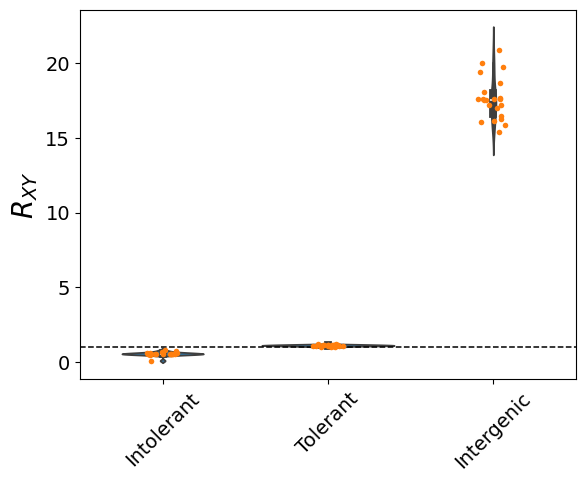

In [25]:
axes = sns.violinplot(data=Rxy, x='Consequence', y='Rxy')
sns.stripplot(data=Rxy, x='Consequence', y='Rxy', jitter=True, size=4)
axes.axhline(1, color="black", linestyle="dashed", linewidth=1.1)
axes.set_xlabel('')
axes.set_ylabel('$R_{XY}$', fontsize=20)
axes.set_xticklabels(['Intolerant', 'Tolerant', 'Intergenic'], fontsize = 14, rotation=45)
axes.tick_params(axis='y', which='major', labelsize=14)

plt.savefig('plots/Rxy_Intergenic_summary.png', dpi=300, bbox_inches='tight')

In [55]:
def calculate_allele_frequency(row):
    if row['Population'] == 'TI':
        return row['Allele Count'] / 30
    elif row['Population'] == 'AU':
        return row['Allele Count'] / 38
    else:
        return row['Allele Count'] /48 # Handle Kaki cases

# Load and process data so we have Allele frequency column
pop_SVdel = pd.read_csv('graphtyper/pop_harmful_SV_allele_frequency_NotPolarised.tsv', delimiter='\t')
pop_SVdel = pop_SVdel[pop_SVdel['Population'] != 'PI']

# Apply the function to create a new column 'Allele Frequency'
pop_SVdel['Allele Frequency'] = pop_SVdel.apply(lambda row: calculate_allele_frequency(row), axis=1)

chromNames = pop_SVdel['Chromosome'].sort_values().drop_duplicates()
chromNames = pd.DataFrame(chromNames, columns=['Chromosome'])

In [58]:
replace_map = {
    '0/0': 0,
    '0/1': 1,
    '1/1': 2
}

indiv_SVdel = pd.read_csv('graphtyper/indiv_harmful_SVallele_frequency.tsv', delimiter='\t')

indiv_SVdel['Genotype'] = indiv_SVdel['Genotype'].replace(replace_map)
indiv_SVdel['Pop_Consequence'] = indiv_SVdel['Population'] + '-' + indiv_SVdel['State'] 

indiv_SVtotal = indiv_SVdel.groupby(['Sample', 'Population', 'State', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Allele Count')
indiv_SVhet = indiv_SVdel[indiv_SVdel['Genotype'] == 1]
indiv_SVhet = indiv_SVhet.groupby(['Sample', 'Population', 'State', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Het Allele Count')
indiv_SVhom = indiv_SVdel[indiv_SVdel['Genotype'] == 2]
indiv_SVhom = indiv_SVhom.groupby(['Sample', 'Population', 'State', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Hom Allele Count')

indiv_SVtotal.head()

C:\Users\Jana\AppData\Local\Temp\ipykernel_16680\3345491412.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  indiv_SVdel['Genotype'] = indiv_SVdel['Genotype'].replace(replace_map)


,Sample,Population,State,Pop_Consequence,Allele Count
0,AU01,AU,Intersecting,AU-Intersecting,172
1,AU01,AU,Nonintersecting,AU-Nonintersecting,839
2,AU03,AU,Intersecting,AU-Intersecting,182
3,AU03,AU,Nonintersecting,AU-Nonintersecting,850
4,AU04,AU,Intersecting,AU-Intersecting,178


In [59]:
SVallele_prop = pd.merge(indiv_SVtotal, indiv_SVhet, on=['Sample', 'Population', 'State', 'Pop_Consequence'])
SVallele_prop = pd.merge(SVallele_prop, indiv_SVhom, on=['Sample', 'Population', 'State', 'Pop_Consequence'])

SVallele_prop['Het Prop'] = SVallele_prop['Het Allele Count'] / SVallele_prop['Allele Count']
SVallele_prop['Hom Prop'] = SVallele_prop['Hom Allele Count'] / SVallele_prop['Allele Count']

SVallele_prop.head()

,Sample,Population,State,Pop_Consequence,Allele Count,Het Allele Count,Hom Allele Count,Het Prop,Hom Prop
0,AU01,AU,Intersecting,AU-Intersecting,172,20,152,0.116279,0.883721
1,AU01,AU,Nonintersecting,AU-Nonintersecting,839,137,702,0.163290,0.836710
2,AU03,AU,Intersecting,AU-Intersecting,182,32,150,0.175824,0.824176
3,AU03,AU,Nonintersecting,AU-Nonintersecting,850,124,726,0.145882,0.854118
4,AU04,AU,Intersecting,AU-Intersecting,178,28,150,0.157303,0.842697


C:\Users\Jana\AppData\Local\Temp\ipykernel_16680\3743263635.py:9: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  stripplot_0 = sns.stripplot(SVallele_prop, x='Pop_Consequence', y='Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[0])
C:\Users\Jana\AppData\Local\Temp\ipykernel_16680\3743263635.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
C:\Users\Jana\AppData\Local\Temp\ipykernel_16680\3743263635.py:18: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(SVallele_prop, x='Pop_Consequence', y='Het Prop', hue='Pop_Consequen

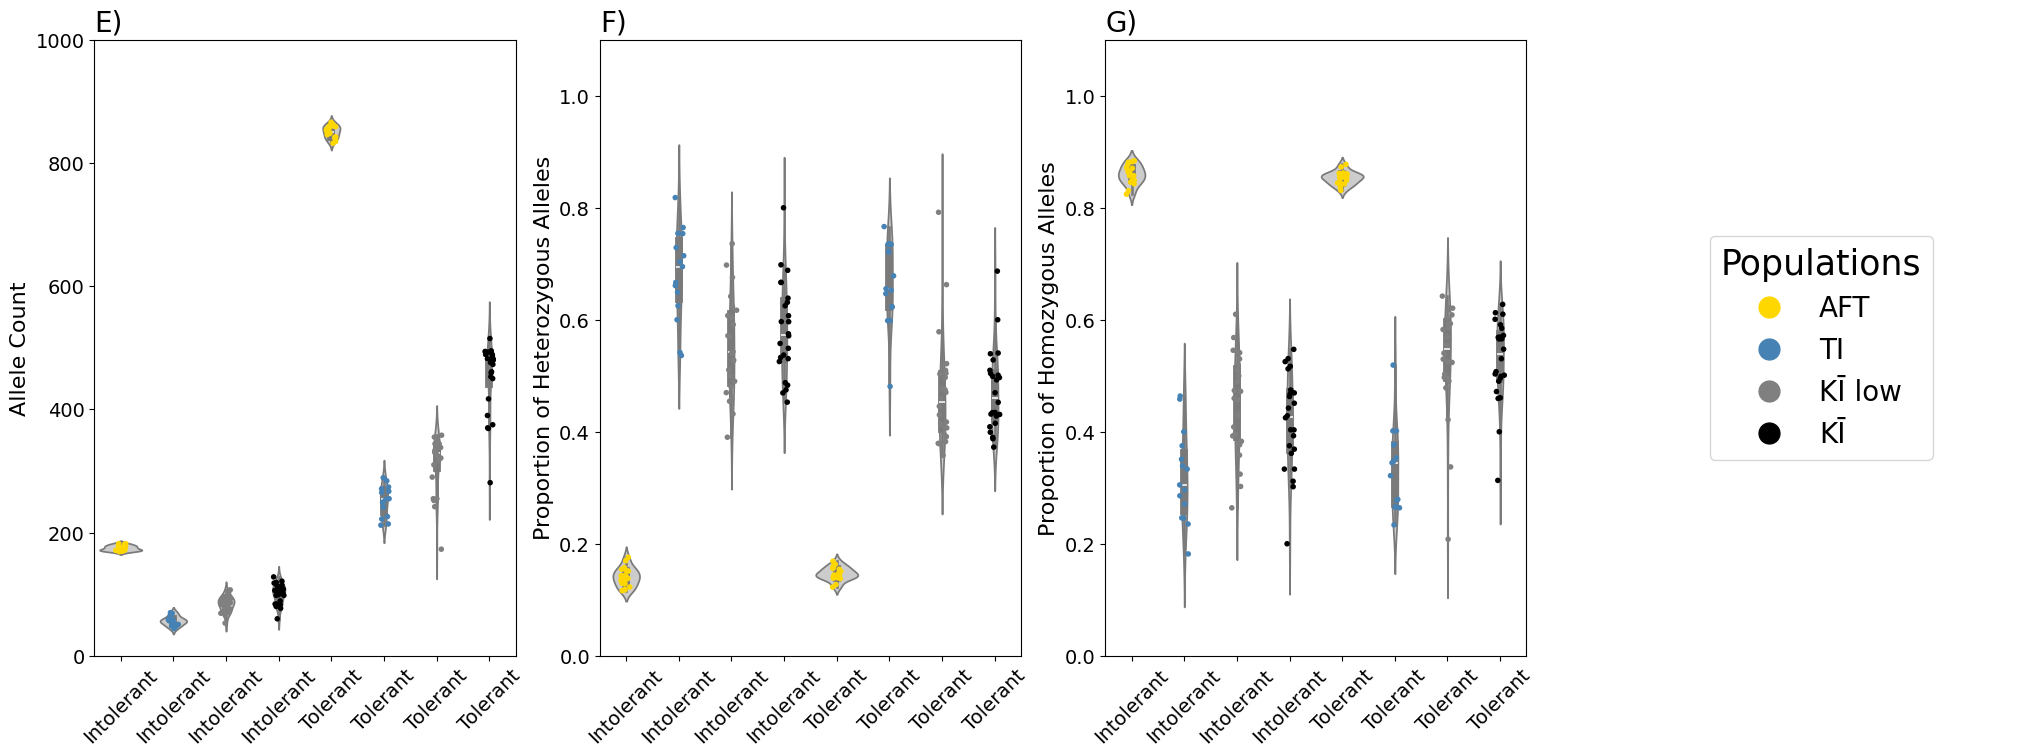

In [60]:
import matplotlib.lines as mlines

palette = ['gold', 'steelblue', 'grey', 'black']
order = ['AU-Intersecting', 'TI-Intersecting', 'KI_10x-Intersecting', 'KI-Intersecting', 'AU-Nonintersecting', 'TI-Nonintersecting', 'KI_10x-Nonintersecting', 'KI-Nonintersecting']

fig, axes = plt.subplots(1, 4, figsize=(25, 8), sharex=False, sharey=False)

sns.violinplot(SVallele_prop, x='Pop_Consequence', y='Allele Count', order=order, color='0.8', ax=axes[0])
stripplot_0 = sns.stripplot(SVallele_prop, x='Pop_Consequence', y='Allele Count', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[0])
axes[0].set_title('E)', loc='left', fontsize=20)
axes[0].set_xlabel('')
axes[0].set_ylabel('Allele Count', fontsize=16)
axes[0].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[0].tick_params(axis='y', which='major', labelsize=14)
axes[0].set_ylim(0, 1000)

sns.violinplot(SVallele_prop, x='Pop_Consequence', y='Het Prop', order=order, color='0.8', ax=axes[1])
sns.stripplot(SVallele_prop, x='Pop_Consequence', y='Het Prop', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[1])
axes[1].set_title('F)', loc='left', fontsize=20)
axes[1].set_xlabel('')
axes[1].set_ylabel('Proportion of Heterozygous Alleles', fontsize=16)
axes[1].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[1].tick_params(axis='y', which='major', labelsize=14)
axes[1].set_ylim(0, 1.1)

sns.violinplot(SVallele_prop, x='Pop_Consequence', y='Hom Prop', order=order, color='0.8', ax=axes[2])
sns.stripplot(SVallele_prop, x='Pop_Consequence', y='Hom Prop', hue='Pop_Consequence', hue_order=order, palette=palette, jitter=True, size=4, ax=axes[2])
axes[2].set_title('G)', loc='left', fontsize=20)
axes[2].set_xlabel('')
axes[2].set_ylabel('Proportion of Homozygous Alleles', fontsize=16)
axes[2].set_xticklabels(['Intolerant', 'Intolerant', 'Intolerant', 'Intolerant', 'Tolerant', 'Tolerant', 'Tolerant', 'Tolerant'], fontsize = 14, rotation=45)
axes[2].tick_params(axis='y', which='major', labelsize=14)
axes[2].set_ylim(0, 1.1)

axes[3].axis('off')
# Define custom legend elements
legend_labels = ['AFT', 'TI', 'KĪ low', 'KĪ']
legend_colors = ['gold', 'steelblue', 'grey', 'black']  # Adjust colors as needed
handles = [mlines.Line2D([], [], color=color, marker='o', markersize=15, linestyle='None', label=label) for color, label in zip(legend_colors, legend_labels)]

# Add the custom legend to the fourth subplot
axes[3].legend(handles=handles, loc='center', fontsize=20, title='Populations', title_fontsize=25)

plt.savefig('plots/Figure_6_load_SV_summary.png', dpi=300, bbox_inches='tight')

nonparametric Wilcoxon–Mann–Whitney tests for statistical comparisons between groups

In [85]:
# Define the Mann-Whitney test function
def mann_whitney_test(df, group_col, value_col, group1, group2):
    group1_values = df[df[group_col] == group1][value_col]
    group2_values = df[df[group_col] == group2][value_col]
    stat, p_value = mannwhitneyu(group1_values, group2_values, alternative='two-sided')
    return stat, p_value

# Function to perform Mann-Whitney U test for all group pairs
def perform_tests(df, group_col, value_col, groups):
    results = {}
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            stat, p_value = mann_whitney_test(df, group_col, value_col, group1, group2)
            results[f'{group1} vs {group2}'] = {'stat': stat, 'p_value': p_value}
    return results

# Function to perform Mann-Whitney U test for columns with the same title in two different DataFrames
def perform_tests_within_df(df, group_col, value_col1, value_col2):
    combined_results = {}
    groups = df[group_col].unique()

    for group in groups:
        group_values_df1 = df[df[group_col] == group][value_col1]
        group_values_df2 = df[df[group_col] == group][value_col2]
        
        # Ensure that both groups have values
        if not group_values_df1.empty and not group_values_df2.empty:
            stat, p_value = mannwhitneyu(group_values_df1, group_values_df2, alternative='two-sided')
            combined_results[f'{group}'] = {'stat': stat, 'p_value': p_value}
        else:
            combined_results[f'{group}'] = {'stat': None, 'p_value': None, 'message': 'One or both groups are empty'}
    
    return combined_results


#def perform_tests_between_all_groups(df, group_col, value_col1, value_col2):
#    combined_results = {}
#    groups = df[group_col].unique()
#    
#    for i in range(len(groups)):
#        for j in range(i + 1, len(groups)):
#            group1 = groups[i]
#            group2 = groups[j]
#            
#            group1_values_col1 = df[df[group_col] == group1][value_col1]
#            group1_values_col2 = df[df[group_col] == group1][value_col2]
#            group2_values_col1 = df[df[group_col] == group2][value_col1]
#            group2_values_col2 = df[df[group_col] == group2][value_col2]
#            
#            # Ensure that both groups have values
#            if not group1_values_col1.empty and not group2_values_col1.empty:
#                stat1, p_value1 = mannwhitneyu(group1_values_col1, group2_values_col1, alternative='two-sided')
#                combined_results[f'{group1} {value_col1} vs {group2} {value_col1}'] = {'stat': stat1, 'p_value': p_value1}
#            else:
#                combined_results[f'{group1} {value_col1} vs {group2} {value_col1}'] = {'stat': None, 'p_value': None, 'message': 'One or both groups are empty for Value1'}
#
#            if not group1_values_col2.empty and not group2_values_col2.empty:
#                stat2, p_value2 = mannwhitneyu(group1_values_col2, group2_values_col2, alternative='two-sided')
#                combined_results[f'{group1} {value_col2} vs {group2} {value_col2}'] = {'stat': stat2, 'p_value': p_value2}
#            else:
#                combined_results[f'{group1} {value_col2} vs {group2} {value_col2}'] = {'stat': None, 'p_value': None, 'message': 'One or both groups are empty for Value2'}
#
#    return combined_results

def perform_tests_between_columns(df, group_col, subgroup_col, test_col1, test_col2):
    """
    Perform Mann-Whitney U tests between two specified columns within each subgroup and group.

    Args:
        df (pd.DataFrame): The data frame containing the data.
        group_col (str): Column defining the groups (e.g., Population).
        subgroup_col (str): Column defining the subgroups (e.g., Pop_Consequence).
        test_col1 (str): The first column to test (e.g., Het_Prop).
        test_col2 (str): The second column to test (e.g., Hom_Prop).

    Returns:
        dict: A dictionary containing the test results for each group and subgroup.
    """
    combined_results = {}

    # Group by subgroup (e.g., Pop_Consequence)
    subgroups = df[subgroup_col].unique()
    
    for subgroup in subgroups:
        subgroup_data = df[df[subgroup_col] == subgroup]
        groups = subgroup_data[group_col].unique()

        for group in groups:
            group_data = subgroup_data[subgroup_data[group_col] == group]
            values_col1 = group_data[test_col1]
            values_col2 = group_data[test_col2]

            # Perform the test only if both columns have values
            if not values_col1.empty and not values_col2.empty:
                stat, p_value = mannwhitneyu(values_col1, values_col2, alternative='two-sided')
                result_key = f'{subgroup}: {group} ({test_col1} vs {test_col2})'
                combined_results[result_key] = {'stat': stat, 'p_value': p_value}
            else:
                result_key = f'{subgroup}: {group} ({test_col1} vs {test_col2})'
                combined_results[result_key] = {'stat': None, 'p_value': None, 'message': 'One or both columns are empty'}

    return combined_results

In [86]:
perform_tests_between_columns(df=allele_prop, group_col='Population', test_col1='Het Prop', test_col2='Hom Prop', subgroup_col='Pop_Consequence')

{'AU-Intolerant: AU (Het Prop vs Hom Prop)': {'stat': 361.0,
  'p_value': 1.4798065133032065e-07},
 'AU-Tolerant: AU (Het Prop vs Hom Prop)': {'stat': 0.0,
  'p_value': 1.4798065133032065e-07},
 'KI-Intolerant: KI (Het Prop vs Hom Prop)': {'stat': 517.0,
  'p_value': 3.090454980572728e-08},
 'KI-Tolerant: KI (Het Prop vs Hom Prop)': {'stat': 529.0,
  'p_value': 6.6368856429973785e-09},
 'KI_10X-Intolerant: KI_10X (Het Prop vs Hom Prop)': {'stat': 471.0,
  'p_value': 6.020981732630601e-06},
 'KI_10X-Tolerant: KI_10X (Het Prop vs Hom Prop)': {'stat': 567.0,
  'p_value': 9.32485400964649e-09},
 'TI-Intolerant: TI (Het Prop vs Hom Prop)': {'stat': 225.0,
  'p_value': 3.391821390825095e-06},
 'TI-Tolerant: TI (Het Prop vs Hom Prop)': {'stat': 225.0,
  'p_value': 3.391821390825095e-06}}

In [77]:
# Groups to compare
SNPgroups = ['AU-Intolerant', 'TI-Intolerant', 'KI_10X-Intolerant', 'KI-Intolerant', 'AU-Tolerant', 'TI-Tolerant', 'KI_10X-Tolerant', 'KI-Tolerant']
Rxy_groups = ['Intolerant', 'Tolerant', 'Intergenic']

# Perform the tests 
SNPresults_total = perform_tests(allele_prop, 'Pop_Consequence', 'Allele Count', SNPgroups)
SNPresults_het = perform_tests(allele_prop, 'Pop_Consequence', 'Het Prop', SNPgroups)
SNPresults_hom = perform_tests(allele_prop, 'Pop_Consequence', 'Hom Prop', SNPgroups)
SNPresults_hetvshom = perform_tests_between_all_groups(allele_prop, 'Pop_Consequence', 'Hom Prop', 'Het Prop')
results_rxy = perform_tests(Rxy, 'Consequence', 'Rxy', Rxy_groups)

# Print the results for SNPindiv_total
print("Mann-Whitney U Test results for all SNP derived alleles:")
for comparison, result in SNPresults_total.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print the results for SNPindiv_het
print("Mann-Whitney U Test results for heterozygous derived alleles:")
for comparison, result in SNPresults_het.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print the results for SNPindiv_hom
print("Mann-Whitney U Test results for homozygous derived alleles:")
for comparison, result in SNPresults_hom.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print the results for Rxy
print("Mann-Whitney U Test results for Rxy:")
for comparison, result in results_rxy.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print results for SNPindiv_het vs SNPindiv_hom
print("Mann-Whitney U Test results between heterozygous and homozyous alleles:")
for comparison, result in SNPresults_hetvshom.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

Mann-Whitney U Test results for all SNP derived alleles:
AU-Intolerant vs TI-Intolerant: U-statistic = 285.0, p-value = 8.347314520257902e-07
AU-Intolerant vs KI_10X-Intolerant: U-statistic = 437.0, p-value = 3.5997949014772376e-08
AU-Intolerant vs KI-Intolerant: U-statistic = 77.0, p-value = 0.0003652151824936864
AU-Intolerant vs AU-Tolerant: U-statistic = 0.0, p-value = 1.4751892682772113e-07
AU-Intolerant vs TI-Tolerant: U-statistic = 285.0, p-value = 8.395691384681203e-07
AU-Intolerant vs KI_10X-Tolerant: U-statistic = 15.0, p-value = 2.0204513669198873e-07
AU-Intolerant vs KI-Tolerant: U-statistic = 0.0, p-value = 3.59523214114733e-08
TI-Intolerant vs KI_10X-Intolerant: U-statistic = 0.0, p-value = 2.784756901878135e-07
TI-Intolerant vs KI-Intolerant: U-statistic = 0.0, p-value = 2.77643734353463e-07
TI-Intolerant vs AU-Tolerant: U-statistic = 0.0, p-value = 8.379539540411818e-07
TI-Intolerant vs TI-Tolerant: U-statistic = 0.0, p-value = 3.3664279926465495e-06
TI-Intolerant vs KI_

In [33]:
SVallele_prop.head()

,Sample,Population,State,Pop_Consequence,Allele Count,Het Allele Count,Hom Allele Count,Het Prop,Hom Prop
0,AU01,AU,Intersecting,AU-Intersecting,172,20,152,0.116279,0.883721
1,AU01,AU,Nonintersecting,AU-Nonintersecting,839,137,702,0.163290,0.836710
2,AU03,AU,Intersecting,AU-Intersecting,182,32,150,0.175824,0.824176
3,AU03,AU,Nonintersecting,AU-Nonintersecting,850,124,726,0.145882,0.854118
4,AU04,AU,Intersecting,AU-Intersecting,178,28,150,0.157303,0.842697


In [ ]:
perform_tests_between_columns(df=SVallele_prop, group_col='Population', test_col1='Het Prop', test_col2='Hom Prop', subgroup_col='Pop_Consequence')

{'AU-Intersecting: AU (Het Prop vs Hom Prop)': {'stat': 0.0,
  'p_value': 1.4568442657806114e-07},
 'AU-Nonintersecting: AU (Het Prop vs Hom Prop)': {'stat': 0.0,
  'p_value': 1.4798065133032065e-07},
 'KI-Intersecting: KI (Het Prop vs Hom Prop)': {'stat': 540.0,
  'p_value': 2.1439158041550528e-07},
 'KI-Nonintersecting: KI (Het Prop vs Hom Prop)': {'stat': 154.0,
  'p_value': 0.005910177030927583},
 'KI_10x-Intersecting: KI_10x (Het Prop vs Hom Prop)': {'stat': 456.5,
  'p_value': 0.0005318195976721623},
 'KI_10x-Nonintersecting: KI_10x (Het Prop vs Hom Prop)': {'stat': 137.0,
  'p_value': 0.0019140289654979322},
 'TI-Intersecting: TI (Het Prop vs Hom Prop)': {'stat': 225.0,
  'p_value': 3.391821390825095e-06},
 'TI-Nonintersecting: TI (Het Prop vs Hom Prop)': {'stat': 224.0,
  'p_value': 4.143220097537536e-06}}

: 

In [40]:
# Groups to compare
SVgroups = ['AU-Intersecting', 'TI-Intersecting', 'KI_10x-Intersecting', 'KI-Intersecting', 'AU-Nonintersecting', 'TI-Nonintersecting', 'KI_10x-Nonintersecting', 'KI-Nonintersecting']

# Perform the tests 
SVresults_total = perform_tests(SVallele_prop, 'Pop_Consequence', 'Allele Count', SVgroups)
SVresults_het = perform_tests(SVallele_prop, 'Pop_Consequence', 'Het Prop', SVgroups)
SVresults_hom = perform_tests(SVallele_prop, 'Pop_Consequence', 'Hom Prop', SVgroups)
SVresults_hetvshom = perform_tests_between_all_groups(SVallele_prop, 'Pop_Consequence', 'Hom Prop', 'Het Prop')

# Print the results for SVindiv_total
print("Mann-Whitney U Test results for all SVs:")
for comparison, result in SVresults_total.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print the results for SVindiv_het
print("Mann-Whitney U Test results for heterozygous SVs:")
for comparison, result in SVresults_het.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print the results for SVindiv_hom
print("Mann-Whitney U Test results for homozygous SVs:")
for comparison, result in SVresults_hom.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

# Print results for SVindiv_het vs SVindiv_hom
print("Mann-Whitney U Test results between heterozygous and homozyous SVs:")
for comparison, result in SVresults_hetvshom.items():
    print(f"{comparison}: U-statistic = {result['stat']}, p-value = {result['p_value']}")

Mann-Whitney U Test results for all SVs:
AU-Intersecting vs TI-Intersecting: U-statistic = 285.0, p-value = 8.061966735715945e-07
AU-Intersecting vs KI_10x-Intersecting: U-statistic = 456.0, p-value = 2.5813922886551574e-08
AU-Intersecting vs KI-Intersecting: U-statistic = 456.0, p-value = 2.5782764424991357e-08
AU-Intersecting vs AU-Nonintersecting: U-statistic = 0.0, p-value = 1.4364415750792503e-07
AU-Intersecting vs TI-Nonintersecting: U-statistic = 0.0, p-value = 8.156152858926488e-07
AU-Intersecting vs KI_10x-Nonintersecting: U-statistic = 10.0, p-value = 1.0209448686863929e-07
AU-Intersecting vs KI-Nonintersecting: U-statistic = 0.0, p-value = 2.5845114348976288e-08
TI-Intersecting vs KI_10x-Intersecting: U-statistic = 15.0, p-value = 2.0182087116819856e-06
TI-Intersecting vs KI-Intersecting: U-statistic = 3.0, p-value = 3.43342686983531e-07
TI-Intersecting vs AU-Nonintersecting: U-statistic = 0.0, p-value = 8.267209282309849e-07
TI-Intersecting vs TI-Nonintersecting: U-statisti

### Harmful alleles relative to *F<sub>ROH</sub>*


In [36]:
roh = pd.read_csv('ROHAN_out/ROHs.tsv', sep='\t')
roh = roh[(roh['Sample']!='SP01') & roh['Sample']!='TI22']


roh_len = roh[['Sample', 'ROH_size', 'ROH_class', 'Population']]
roh_len = roh_len.groupby(['Sample', 'ROH_class', 'Population'])['ROH_size'].sum().reset_index(name='ROH Total')

roh_len['FROH'] = np.where(roh_len['Population'] == 'KI', 
                                 roh_len['ROH Total'] / 1095624494,
                                 roh_len['ROH Total'] / 1088797119)

roh_len = roh_len.groupby(['Sample','Population'])['FROH'].sum().reset_index()

indiv_del = pd.read_csv('load/indiv_harmful_allele_frequency.tsv', delimiter='\t')

replace_map = {
    '0/0': 0,
    '0/1': 1,
    '1/1': 2
}

indiv_del['Genotype'] = indiv_del['Genotype'].replace(replace_map)
indiv_del['Pop_Consequence'] = indiv_del['Population'] + '-' + indiv_del['Consequence']

indiv_total = indiv_del.groupby(['Sample', 'Population', 'Consequence', 'Pop_Consequence'])['Genotype'].sum().reset_index(name='Allele Count')

roh_del = pd.merge(indiv_total, roh_len, on=['Sample', 'Population'])
roh_intolerant = roh_del[roh_del['Consequence']=='Intolerant']
roh_intolerant.head()

C:\Users\Jana\AppData\Local\Temp\ipykernel_31004\1794334120.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  indiv_del['Genotype'] = indiv_del['Genotype'].replace(replace_map)


,Sample,Population,Consequence,Pop_Consequence,Allele Count,FROH
0,AU01,AU,Intolerant,AU-Intolerant,429,0.065485
2,AU03,AU,Intolerant,AU-Intolerant,412,0.085186
4,AU04,AU,Intolerant,AU-Intolerant,412,0.044774
6,AU06,AU,Intolerant,AU-Intolerant,390,0.051938
8,AU08,AU,Intolerant,AU-Intolerant,404,0.053270


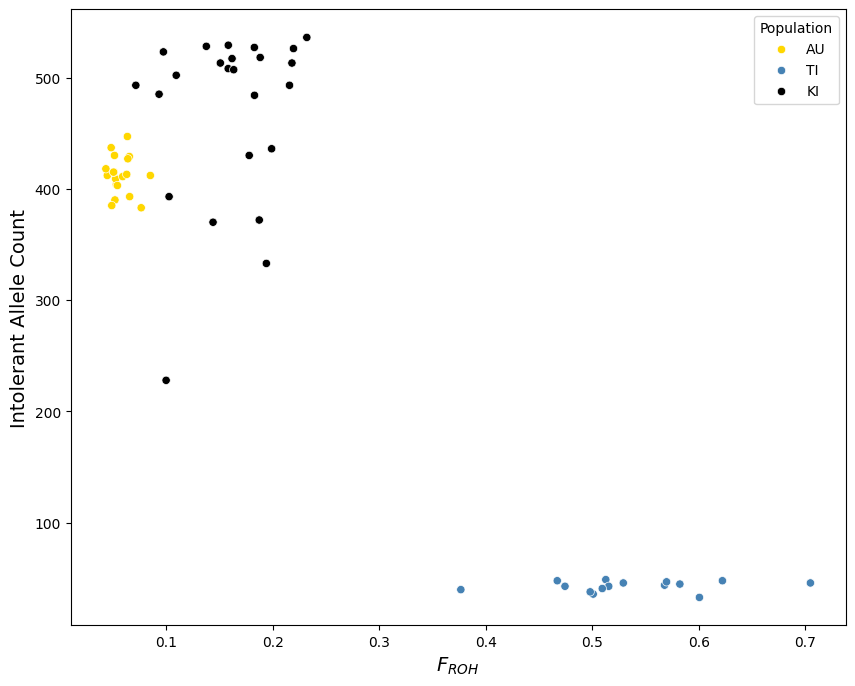

In [37]:
palette = ['gold', 'steelblue', 'black']
order = ['AU', 'TI', 'KI']

plt.figure(figsize=(10, 8))

palette = ['gold', 'steelblue', 'black']

ax = sns.scatterplot(roh_intolerant, x='FROH', y='Allele Count', hue='Population', hue_order=order, palette=palette)
ax.set_ylabel('Intolerant Allele Count', fontsize=14)
ax.set_xlabel('$F_{ROH}$', fontsize=14)

plt.savefig('plots/roh_intolerantAlleleCount.png', dpi=300, bbox_inches='tight')